In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

X=df.drop(['median_house_value'], axis=1)
y=df['median_house_value']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [7]:
train_data = X_train. join(Y_train)

In [8]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4114,-118.41,34.14,33.0,778.0,143.0,258.0,130.0,5.7380,<1H OCEAN,497600.0
4066,-118.47,34.16,30.0,3823.0,740.0,1449.0,612.0,4.6000,<1H OCEAN,392500.0
11700,-117.97,33.88,9.0,1344.0,279.0,530.0,265.0,5.0731,<1H OCEAN,185100.0
16904,-122.35,37.58,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,NEAR OCEAN,345000.0
9139,-118.26,34.50,6.0,5813.0,908.0,2275.0,790.0,4.7778,INLAND,340400.0
...,...,...,...,...,...,...,...,...,...,...
13070,-121.31,38.58,10.0,2421.0,580.0,962.0,497.0,2.5035,INLAND,112500.0
16114,-122.50,37.74,44.0,2792.0,615.0,1640.0,579.0,4.0625,NEAR OCEAN,272800.0
17030,-122.25,37.51,45.0,989.0,174.0,504.0,180.0,4.8382,NEAR OCEAN,289400.0
4829,-118.30,34.04,24.0,2092.0,585.0,1757.0,538.0,1.7109,<1H OCEAN,175000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

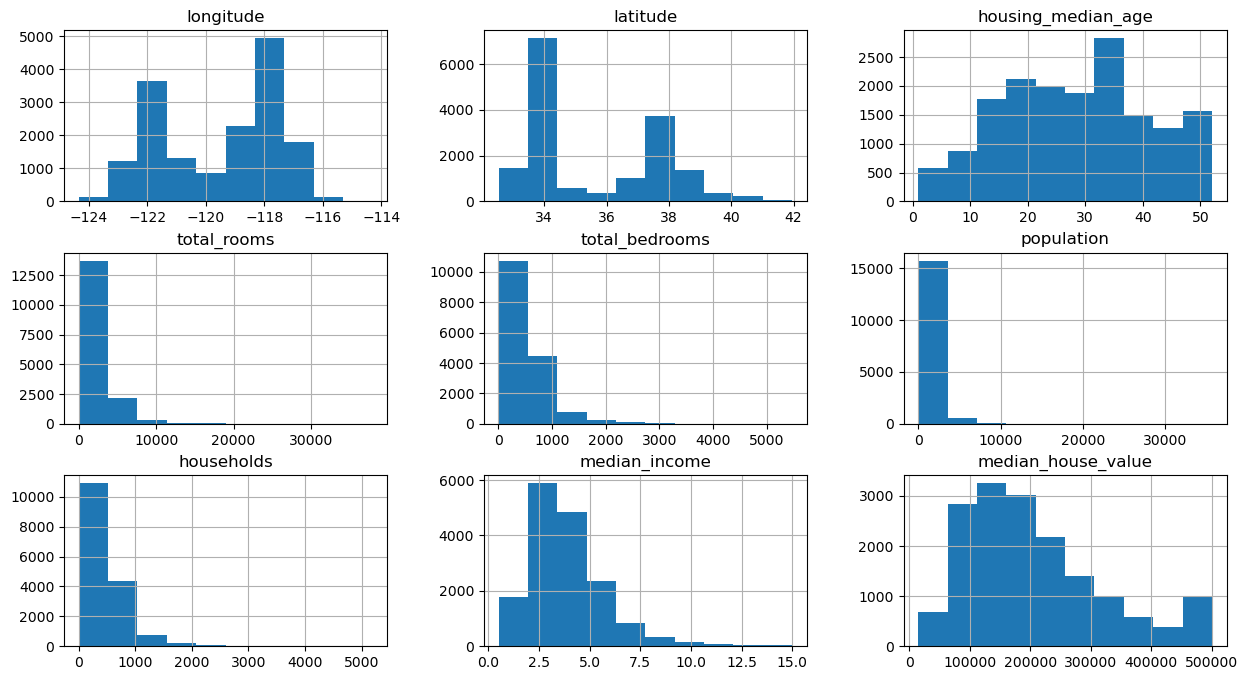

In [9]:
train_data.hist(figsize=(15, 8))

In [10]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.926192,-0.105451,0.043154,0.067981,0.098158,0.055258,-0.012196,-0.040964
latitude,-0.926192,1.000000,0.008433,-0.033616,-0.064562,-0.105887,-0.069743,-0.079899,-0.145494
housing_median_age,-0.105451,0.008433,1.000000,-0.362724,-0.321830,-0.297900,-0.304462,-0.117931,0.107507
total_rooms,0.043154,-0.033616,-0.362724,1.000000,0.928936,0.854064,0.917363,0.194100,0.131934
total_bedrooms,0.067981,-0.064562,-0.321830,0.928936,1.000000,0.875732,0.979628,-0.014221,0.046587
population,0.098158,-0.105887,-0.297900,0.854064,0.875732,1.000000,0.905120,0.000009,-0.027596
households,0.055258,-0.069743,-0.304462,0.917363,0.979628,0.905120,1.000000,0.006635,0.061456
median_income,-0.012196,-0.079899,-0.117931,0.194100,-0.014221,0.000009,0.006635,1.000000,0.687514
median_house_value,-0.040964,-0.145494,0.107507,0.131934,0.046587,-0.027596,0.061456,0.687514,1.000000


<Axes: >

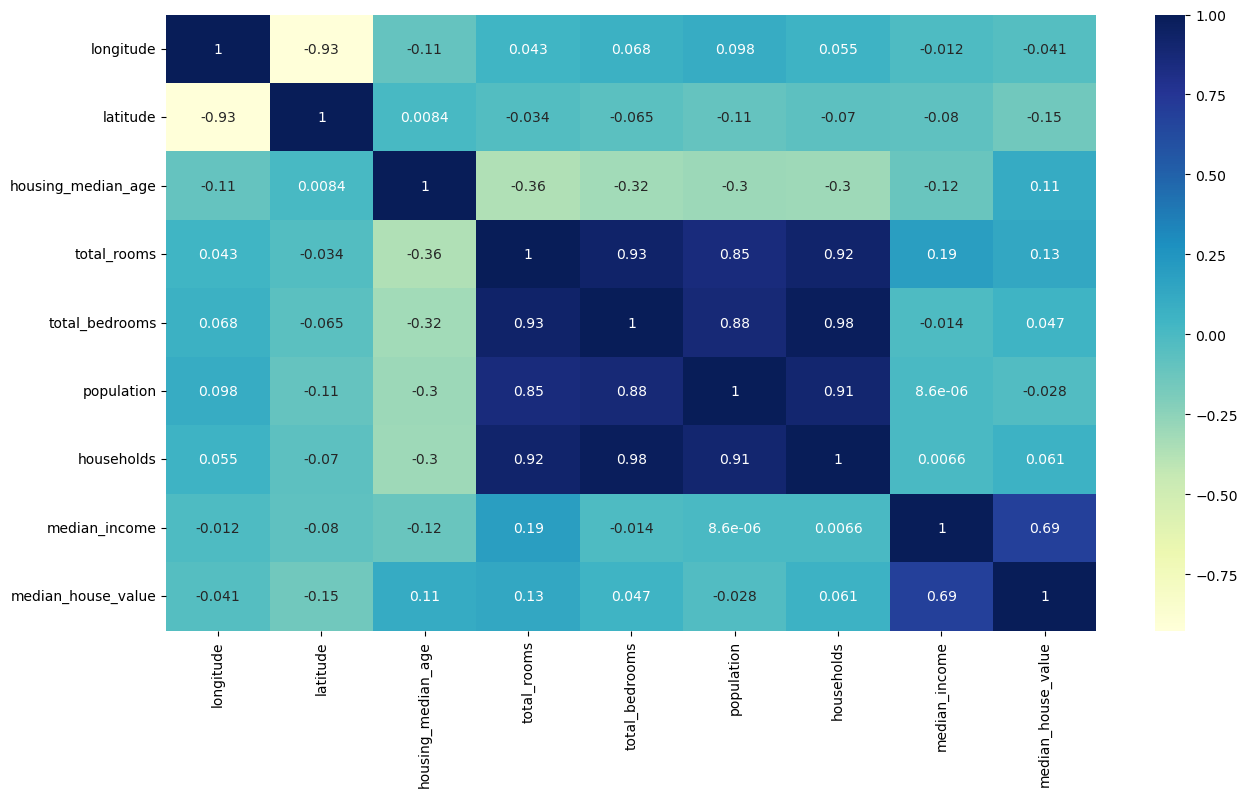

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

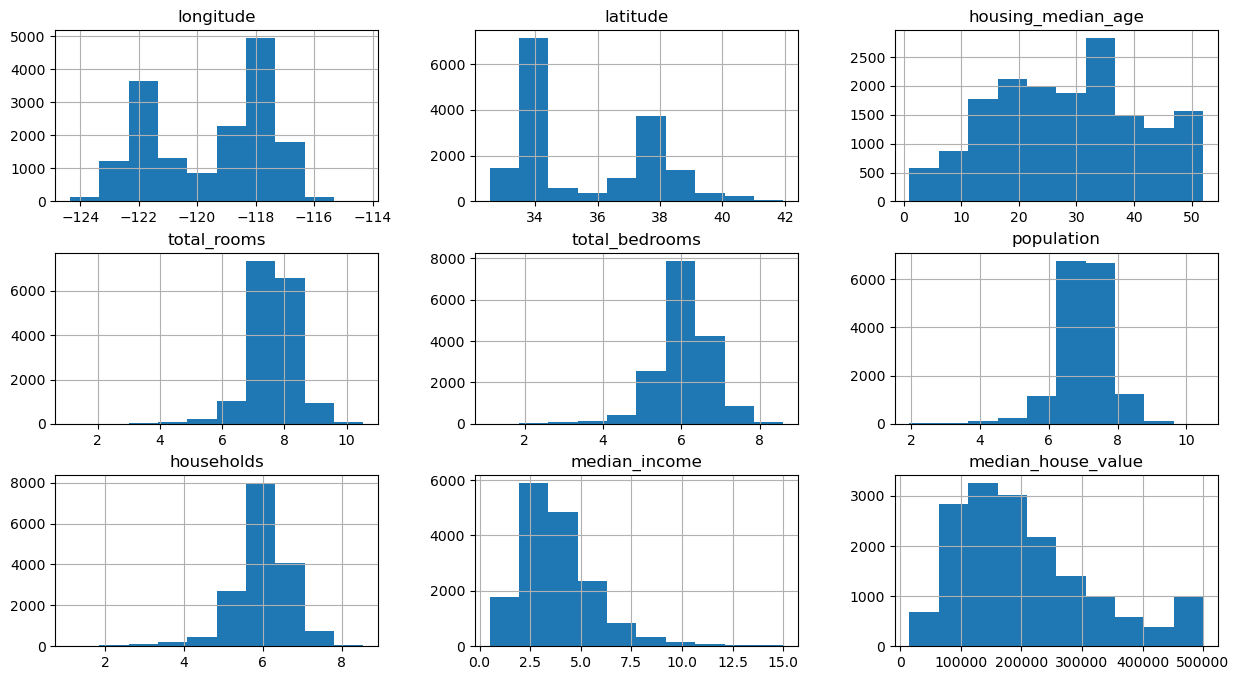

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

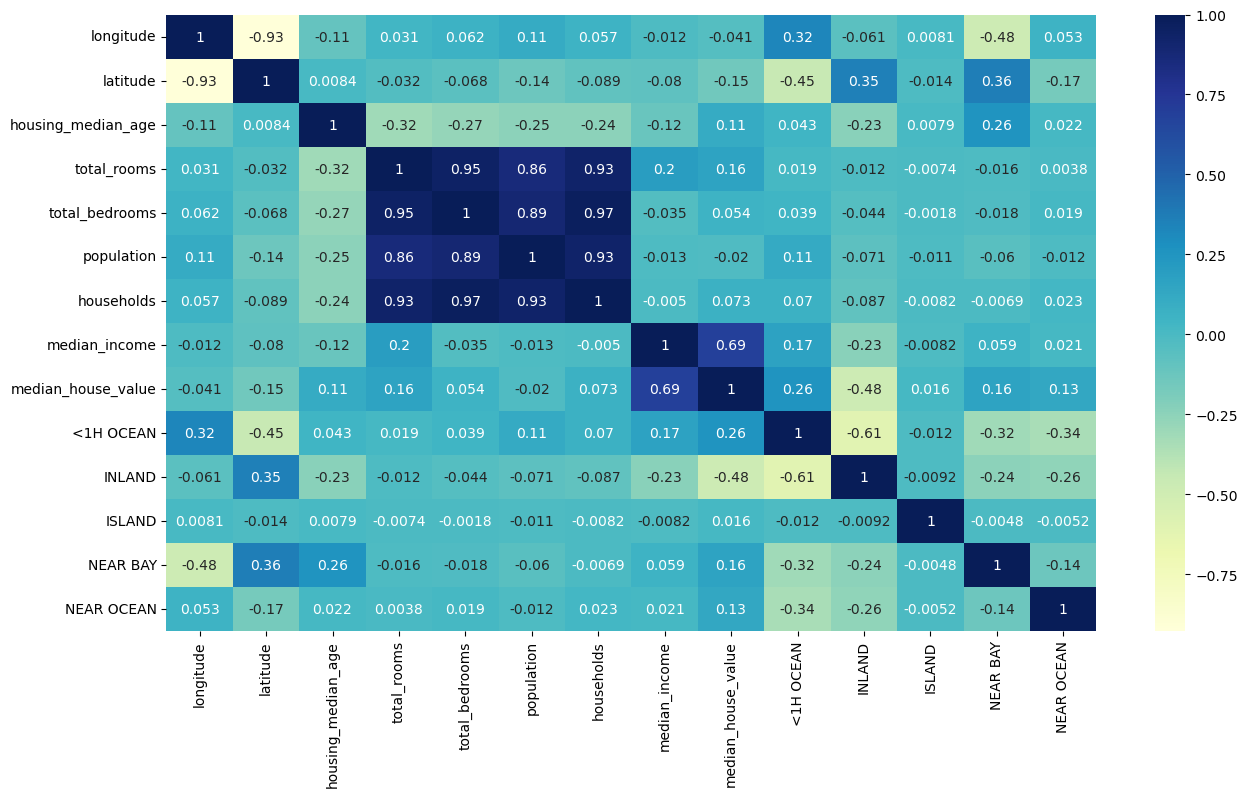

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [16]:
train_data['bedroom ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

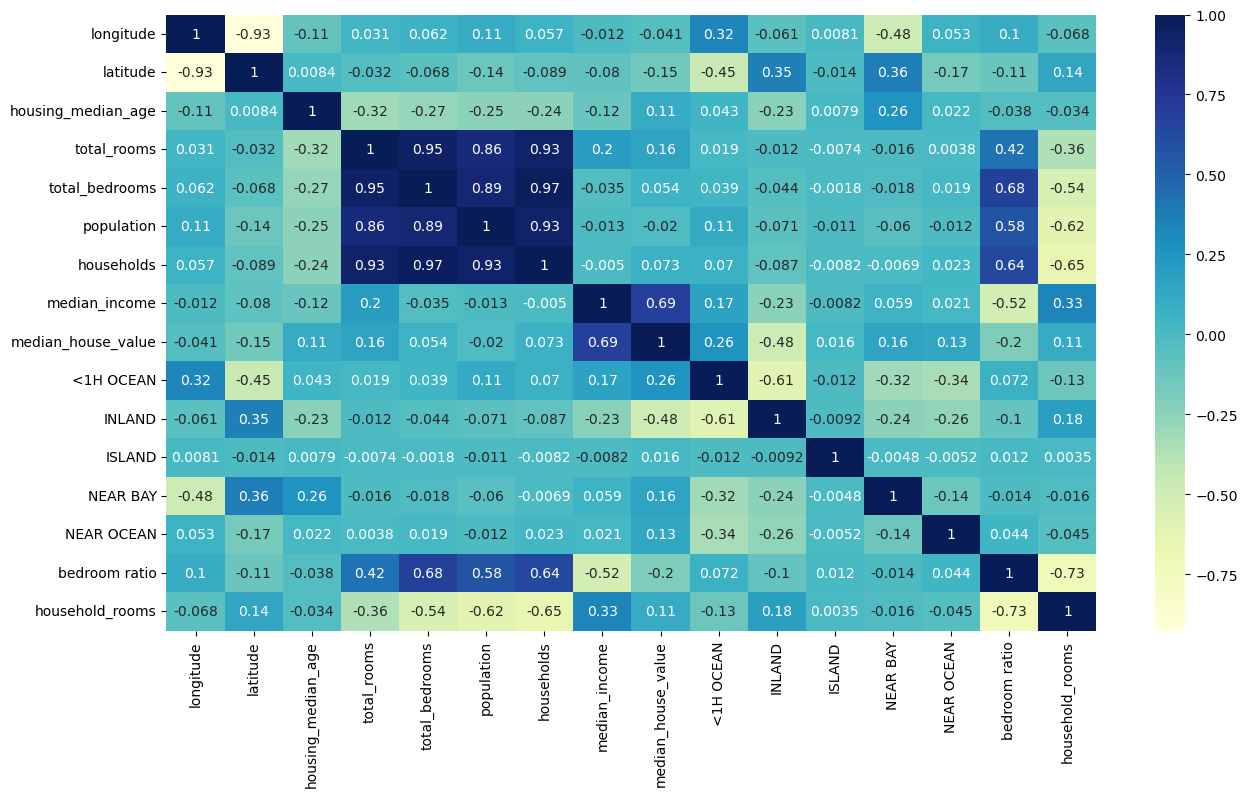

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression ()
reg.fit(X_train_s, Y_train)

LinearRegression()

In [19]:
test_data = X_test. join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households']= np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [20]:
X_test, Y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [28]:
X_test_s=scaler.transform(X_test)

In [29]:
reg.score(X_test_s, Y_test)

0.6842150851714228

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [22]:
forest.score(X_test, Y_test)

0.8206192360485254

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100, warm_start=True)
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(gbm, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(warm_start=True),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=8, n_estimators=300, warm_start=True)

In [30]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.8423964375838153